### Introduction
I will introduce ith here

### Key Findings
- top 10 most popular apps:
	- all apps have the same and highest value of installations that Google Play Store provides (1,000,000,000+)
	- all apps have rating reaching from 4.3 to 4.5
	- most common category is 'Communication' but there are many others
        - there are 8 different categories among the top 10 most popular apps
	- the most common content rating is 'Everyone'
	- all of the apps are free
- the whole dataset:
	- the categories used in the top 10 most popular apps are not commonly used across the whole dataset
		- finding niche might be a good course of action if we aim to develop one of the top apps on the market
	- the most coomonly used categories are family, games, and tools
	- the most commonly used content rating is 'Everyone'
	- the price, number of installations, and reviews are usually low, with expection to rating whcih has an average of 4.2
	 - the majority of apps are free (7592 / 8196)
		- the average price is 1.04 USD with few extreme outliners
		- the most common price is located between 0 and 5 USD
	- the only significant correlation exists between reviews and ratings
		- apps with higher rating usually have more reviews
		- we can then hypothesize that an app with higher rating attracts users to download the app and leave a 
		  review which would explain the relationship

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

### Cleaning Data

#### Loading data and creating a copy of the data frame to work with

In [2]:
df_raw = pd.read_csv("C:/Users/tomas/OneDrive/Plocha/GooglePlayStoreApps_Analysis/googleplaystore.csv")
df = df_raw.copy()
print(df.columns)
df

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Dropping columns that will not be used in EDA

In [3]:
df = df.drop(['Size', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity


#### Examining incorrectly inserted values
- row number 10472 has incorrectly inserted values
- we do not know the number of reviews so the best action now is to drop the column

In [4]:
print("Unique values for 'Content Rating':\n")
print(df['Content Rating'].unique())
df.sort_values('Price', ascending=False).head(2)

Unique values for 'Content Rating':

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,Everyone,NaN,"February 11, 2018"
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design


#### Dropping missing values

In [5]:
print('Missing values in columns:\n')
print(df.isna().sum())
print('_____________________________________\n')
df = df.dropna()
df.info()

Missing values in columns:

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64
_____________________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Type            9366 non-null   object 
 6   Price           9366 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9366 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.7+ KB


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Type            9366 non-null   object 
 6   Price           9366 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9366 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.7+ KB


#### Dropping duplicate App names
- there are many apps that appeared multiple times in the dataset

In [7]:
df = df.drop_duplicates(subset=['App'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Installs        8196 non-null   object 
 5   Type            8196 non-null   object 
 6   Price           8196 non-null   object 
 7   Content Rating  8196 non-null   object 
 8   Genres          8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


#### Removing '+' and ',' from 'Installs' column

In [8]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_2164\1556284288.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity


#### Removing '$' sign from 'Price' column

In [9]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'].unique()

C:\Users\tomas\AppData\Local\Temp\ipykernel_2164\3315532784.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

#### Correcting datatypes
- most of the datatypes are classified as objects
- we need to cast some of them into integers and floats to be able to conduct the analysis

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [11]:
df['Reviews'] = df['Reviews'].astype('int')
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

#### Cleaned dataframe

In [12]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity


#### Exporting cleaned dataframe to csv

In [164]:
df.to_csv('GoogleApps_Cleaned.csv')

### Exploratory Data Analysis

#### Finding the top 10 most popular apps
- we need to decide how to calcualte the top 10 most popular apps
- sorting by rating did not provide much insight since there are 1355 apps with the highest rating (5.0)
- we can include another rating criterium such as the number of installs
    - so we firt sort the valuse by 'Installs' and then by 'Rating'
- lastly, we can select only the columns necessary for the analysis
    - 'Genres' is very similar to 'Category' column so we can drop it as it does not provide more insight
    - 'Type' column is also not necessary since we can see whether the type is free or not from the 'Price' column 

#### Sorting by 'Rating'

In [13]:
df.sort_values('Rating', ascending=False).head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,1000,Free,0.00,Teen,Business
7164,CD CHOICE TUBE,FAMILY,5.0,10,500,Free,0.00,Everyone,Entertainment
7195,CE Smart,TOOLS,5.0,3,100,Free,0.00,Everyone,Tools
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,100,Paid,4.99,Everyone,Education
9341,EG India,LIFESTYLE,5.0,3,100,Free,0.00,Everyone,Lifestyle
8063,cx advance call blocker,PERSONALIZATION,5.0,3,50,Free,0.00,Everyone,Personalization
7212,MCQ CE IT,FAMILY,5.0,22,1000,Free,0.00,Everyone,Education
8058,Oración CX,LIFESTYLE,5.0,103,5000,Free,0.00,Everyone,Lifestyle
9365,Eh Bee Wallpapers HD,PERSONALIZATION,5.0,4,100,Free,0.00,Everyone,Personalization
7239,CF Life,FAMILY,5.0,4,100,Free,0.00,Everyone,Education


In [14]:
df[df['Rating'] == 5.0].sum()

App               Hojiboy Tojiboyev Life HacksAmerican Girls Mob...
Category          COMICSDATINGDATINGDATINGDATINGDATINGDATINGEVEN...
Rating                                                       1355.0
Reviews                                                        2384
Installs                                                      88823
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreePa...
Price                                                        102.03
Content Rating    EveryoneMature 17+Mature 17+TeenMature 17+Matu...
Genres            ComicsDatingDatingDatingDatingDatingDatingEven...
dtype: object

#### Sorting by 'Installs' and 'Rating'

In [15]:
df.sort_values(['Installs', 'Rating'], ascending=False).head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
1654,Subway Surfers,GAME,4.5,27722264,1000000000,Free,0.0,Everyone 10+,Arcade
2545,Instagram,SOCIAL,4.5,66577313,1000000000,Free,0.0,Teen,Social
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,1000000000,Free,0.0,Everyone,Photography
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0.0,Everyone,Communication
3234,Google,TOOLS,4.4,8033493,1000000000,Free,0.0,Everyone,Tools
3454,Google Drive,PRODUCTIVITY,4.4,2731171,1000000000,Free,0.0,Everyone,Productivity
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,Free,0.0,Everyone,Communication
340,Gmail,COMMUNICATION,4.3,4604324,1000000000,Free,0.0,Everyone,Communication
865,Google Play Games,ENTERTAINMENT,4.3,7165362,1000000000,Free,0.0,Teen,Entertainment
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,1000000000,Free,0.0,Everyone,Travel & Local


#### Selecting only necessary columns
- all values in the 'Installs' column have the same value, so we do not need to select the 'Installs' column

In [16]:
top_apps = df[['App', 'Category', 'Rating', 'Installs', 'Content Rating', 'Price']].sort_values(['Installs', 'Rating'], ascending=False).head(10)
top_apps

,App,Category,Rating,Installs,Content Rating,Price
1654,Subway Surfers,GAME,4.5,1000000000,Everyone 10+,0.0
2545,Instagram,SOCIAL,4.5,1000000000,Teen,0.0
2808,Google Photos,PHOTOGRAPHY,4.5,1000000000,Everyone,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,1000000000,Everyone,0.0
3234,Google,TOOLS,4.4,1000000000,Everyone,0.0
3454,Google Drive,PRODUCTIVITY,4.4,1000000000,Everyone,0.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,1000000000,Everyone,0.0
340,Gmail,COMMUNICATION,4.3,1000000000,Everyone,0.0
865,Google Play Games,ENTERTAINMENT,4.3,1000000000,Teen,0.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,1000000000,Everyone,0.0


#### Data visualization for the top 10 most popular apps
- I created a new column 'Ranking' for future reference
    - many of the top 10 apps have the same value of rating so for more truthful visualization I decided to use ratings instead of ranking
        - using ranking would mean that several app with the same rating with would visualized differently
    

#### Creating 'Ranking' column

In [17]:
ranking = [1,2,3,4,5,6,7,8,9,10]
top_apps['Ranking'] = ranking
top_apps

,App,Category,Rating,Installs,Content Rating,Price,Ranking
1654,Subway Surfers,GAME,4.5,1000000000,Everyone 10+,0.0,1
2545,Instagram,SOCIAL,4.5,1000000000,Teen,0.0,2
2808,Google Photos,PHOTOGRAPHY,4.5,1000000000,Everyone,0.0,3
336,WhatsApp Messenger,COMMUNICATION,4.4,1000000000,Everyone,0.0,4
3234,Google,TOOLS,4.4,1000000000,Everyone,0.0,5
3454,Google Drive,PRODUCTIVITY,4.4,1000000000,Everyone,0.0,6
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,1000000000,Everyone,0.0,7
340,Gmail,COMMUNICATION,4.3,1000000000,Everyone,0.0,8
865,Google Play Games,ENTERTAINMENT,4.3,1000000000,Teen,0.0,9
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,1000000000,Everyone,0.0,10


#### Exporting 'top_apps' table to csv

In [163]:
top_apps.to_csv('TopApps.csv')

#### Visualization of top 10 most popular apps

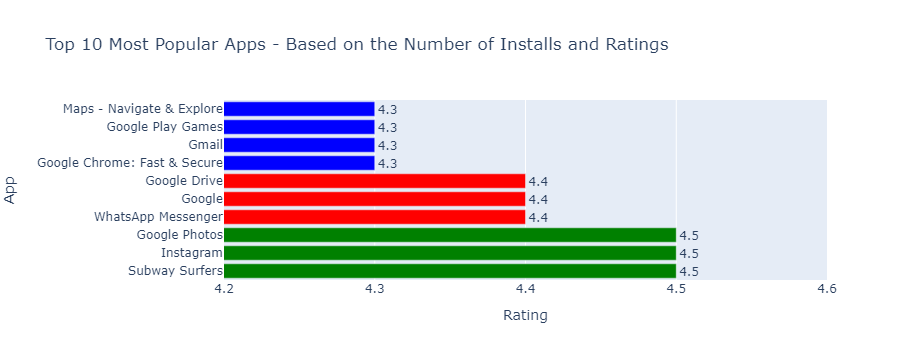

In [120]:
fig = px.bar(top_apps, x='Rating', y='App', text='Rating',
             color_discrete_sequence=[['green', 'green', 'green', 'red', 'red','red', 'blue', 'blue', 'blue', 'blue']],
             title='Top 10 Most Popular Apps - Based on the Number of Installs and Ratings')
#fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})
fig.update_layout(showlegend=False)
fig.update_traces(textposition='outside')
fig.update_xaxes(dtick=0.1, range=[4.2, 4.6]) # creates custom x axis
fig.show()

#### Most common categories of top 10 most popular apps

In [18]:
Categories = top_apps[['Category','Ranking']].groupby('Category', as_index=False).count()
Categories = Categories.rename(columns={'Ranking':'Count'})
Categories

,Category,Count
0,COMMUNICATION,3
1,ENTERTAINMENT,1
2,GAME,1
3,PHOTOGRAPHY,1
4,PRODUCTIVITY,1
5,SOCIAL,1
6,TOOLS,1
7,TRAVEL_AND_LOCAL,1


In [29]:
Categories.to_csv('TopApps_Categories.csv') # exporting to csv

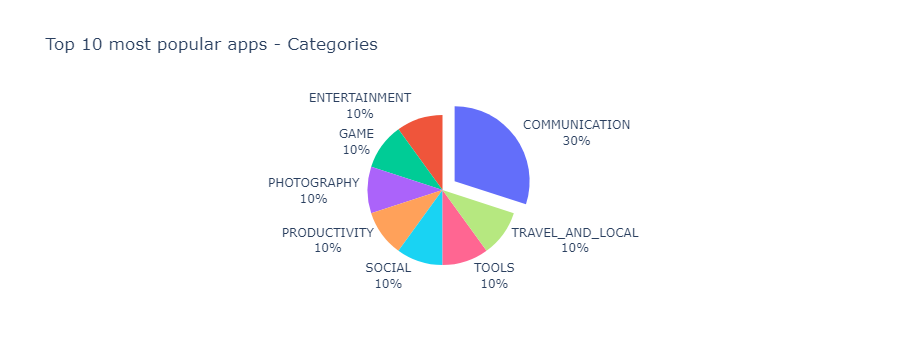

In [123]:
fig = px.pie(Categories, values='Count', names='Category', title='Top 10 most popular apps - Categories')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', pull=[0.2,0,0,0,0,0,0,0])
fig.update_layout(showlegend=False)
fig.show()

#### Most common content ratings of top 10 apps

In [19]:
Content_rating = top_apps[['Content Rating', 'Ranking']].groupby('Content Rating', as_index=False).count()
Content_rating = Content_rating.rename(columns={'Ranking':'Count'})
Content_rating

,Content Rating,Count
0,Everyone,7
1,Everyone 10+,1
2,Teen,2


In [166]:
Content_rating.to_csv('TopApps_ContentRating.csv')

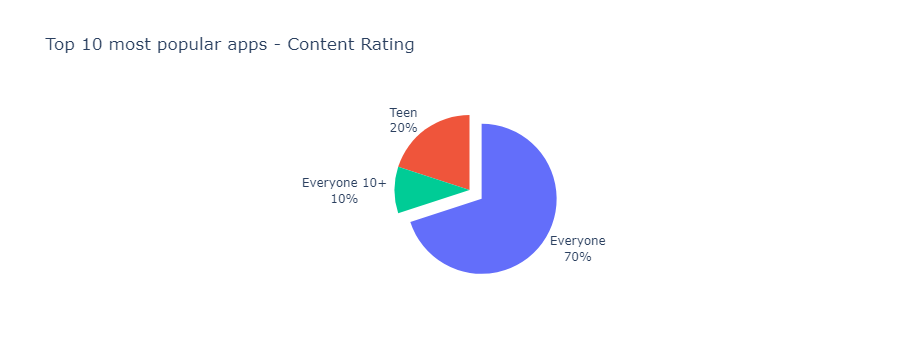

In [125]:
fig = px.pie(Content_rating, values='Count', names='Content Rating', title='Top 10 most popular apps - Content Rating')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2,0,0])
fig.update_layout(showlegend=False)
fig.show()

#### Price of top 10 most popular apps
- All of the top 10 most popular apps are free

In [20]:
top_apps_price = top_apps[['App','Price']]
top_apps_price

,App,Price
1654,Subway Surfers,0.0
2545,Instagram,0.0
2808,Google Photos,0.0
336,WhatsApp Messenger,0.0
3234,Google,0.0
3454,Google Drive,0.0
338,Google Chrome: Fast & Secure,0.0
340,Gmail,0.0
865,Google Play Games,0.0
3117,Maps - Navigate & Explore,0.0


In [167]:
top_apps_price.to_csv('TopApps_Price.csv') # exporting to csv

### Analysis of the whole dataset

#### Most Common Categories
- in the top 10 most popular apps, the most common category was 'Communication' (3/10 apps), but in the whole dataset, the category 'Communication' does not appear very often
    - from 8196 of apps in the whole dataset, only 256 apps is classified in the category 'Communication'
- moreover, in totall, 4/10 categories that appeared in the top 10 most popular apps are not parts of most common categories in the whole dataset
    - 'Coomunication' (256), 'Social' (203), 'Travel And Local' (187), 'Entertainment' (102)
- the implications:
    - if we aim to develop one of the most popular apps, we should not focus on the most commonly used categories but finding our niche
    - on the other hand, if we preffer to attract a big audience, there is a huge market for 'family', 'games', and 'tools'

### Most commonly used categories

In [21]:
overall_category = df[['Category','App']].groupby('Category',as_index=False).count()
overall_category = overall_category.sort_values('App', ascending=False)
overall_category = overall_category.head(10)
overall_category = overall_category.rename(columns={'App':'Count'})
overall_category

,Category,Count
11,FAMILY,1608
14,GAME,912
29,TOOLS,718
12,FINANCE,302
18,LIFESTYLE,301
25,PRODUCTIVITY,301
23,PERSONALIZATION,298
20,MEDICAL,290
4,BUSINESS,263
24,PHOTOGRAPHY,263


In [168]:
overall_category.to_csv('Overall_Category.csv') # exporting to csv

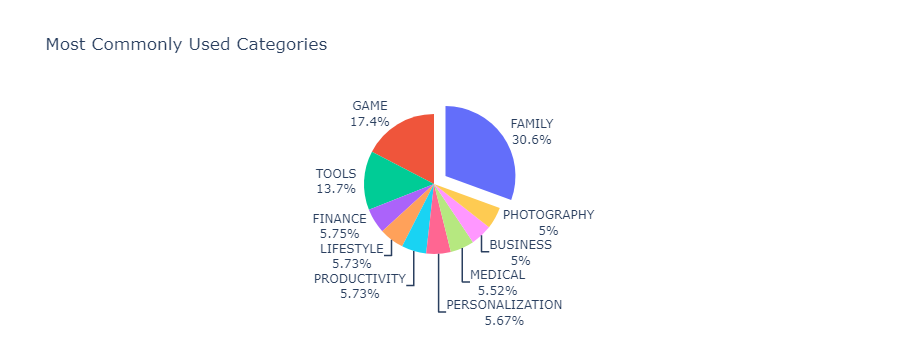

In [30]:
fig = px.pie(overall_category, values='Count', names='Category', title='Most Commonly Used Categories')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2])
fig.update_layout(showlegend=False)
fig.show()

#### Most commonly used content ratings

In [23]:
overall_content_rating = df[['Content Rating','App']].groupby('Content Rating', as_index=False).count()
overall_content_rating = overall_content_rating.sort_values('App', ascending=False)
overall_content_rating = overall_content_rating.head(4)
overall_content_rating = overall_content_rating.rename(columns={'App':'Count'})
overall_content_rating

,Content Rating,Count
1,Everyone,6618
4,Teen,912
3,Mature 17+,357
2,Everyone 10+,305


In [169]:
overall_content_rating.to_csv('Overall_ContentRating.csv') # exporting to csv

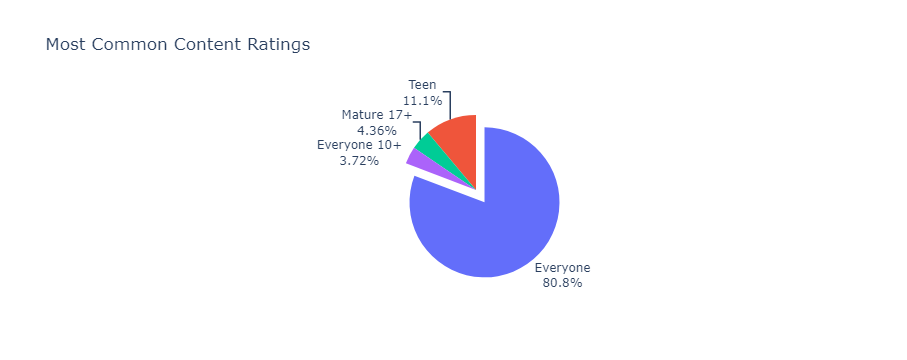

In [183]:
fig = px.pie(overall_content_rating, values='Count', names='Content Rating', title='Most Common Content Ratings')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2])
fig.update_layout(showlegend=False)
fig.show()

#### Distribution of values
- due to the huge difference between x and y axes, I had to use log scale the distribution for 'Price', 'Installs', and 'Reviews'
    - histogram for 'Price' with log scale does not provide truthful insight, so box plot is used to better showcase its distribution
- majority if 'Price', 'Installs', and 'Reviews' are small values
- 'Rating' is the only column with relatively high average rating (4.2)

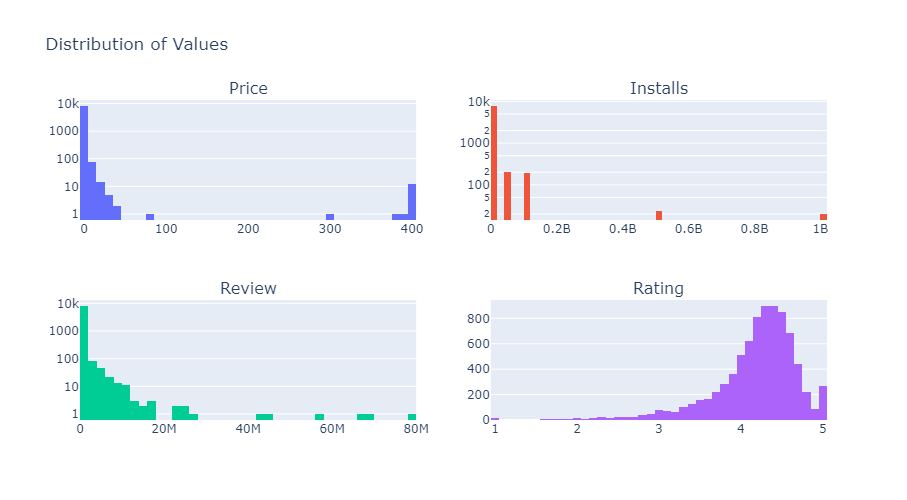

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('Price','Installs','Review','Rating',))
fig.add_trace(go.Histogram(x=df['Price'], nbinsx=50), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Installs'], nbinsx=50), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Reviews'], nbinsx=50), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Rating']), row=2, col=2)
fig.update_layout(height=500, width=700, title_text='Distribution of Values')
fig.update_layout(showlegend=False)
fig.update_yaxes(row=1, col=1, type='log')
fig.update_yaxes(row=1, col=2, type='log')
fig.update_yaxes(row=2, col=1, type='log')
fig.show()

#### Box plot for 'Price'
- as visible, the majority of price is quite low (median 4.84) with few extreme outliners which decrease the average price to 1.04

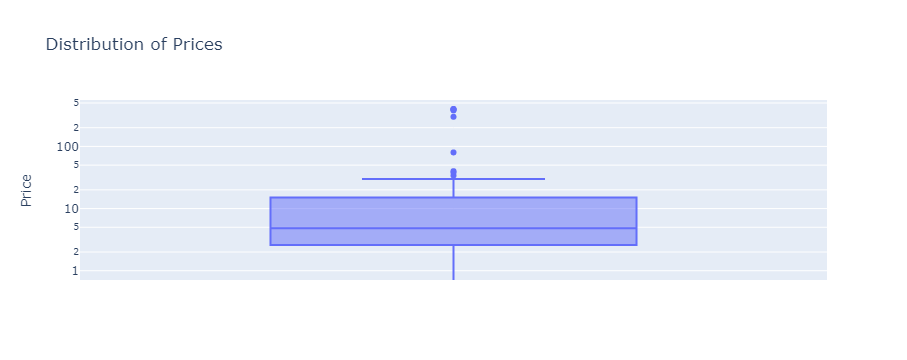

In [36]:
px.box(all_price, y='Price', log_y=True, title='Distribution of Prices')

#### Most common prices
- majority of apps are free
    - 7592 apps out of 8196 is free

In [24]:
overall_price = df.groupby('Price', as_index=False).count().sort_values('App', ascending=False).head(10)
overall_price = overall_price[['Price', 'App']]
overall_price = overall_price.rename(columns={'App':'Count'})
overall_price

,Price,Count
0,0.00,7592
21,2.99,109
1,0.99,104
37,4.99,68
13,1.99,59
30,3.99,52
5,1.49,31
15,2.49,20
39,5.99,14
47,9.99,14


In [170]:
overall_price.to_csv('Overall_CommonPrice.csv') # exporting to csv

#### The distribution of Price
- majority of apps are free, but we can log scale the disribution to get an idea about the other common values which are also quite low
    - 0 - 5 USD is the most common

In [25]:
all_price = df.groupby('Price', as_index=False).count().sort_values('App', ascending=False)
all_price = all_price[['Price', 'App']]
all_price = all_price.rename(columns={'App':'Count'})
all_price

,Price,Count
0,0.00,7592
21,2.99,109
1,0.99,104
37,4.99,68
13,1.99,59
...,...,...
31,4.29,1
33,4.59,1
34,4.60,1
35,4.77,1


In [171]:
all_price.to_csv('Overall_AllPrice.csv') # exporting to csv

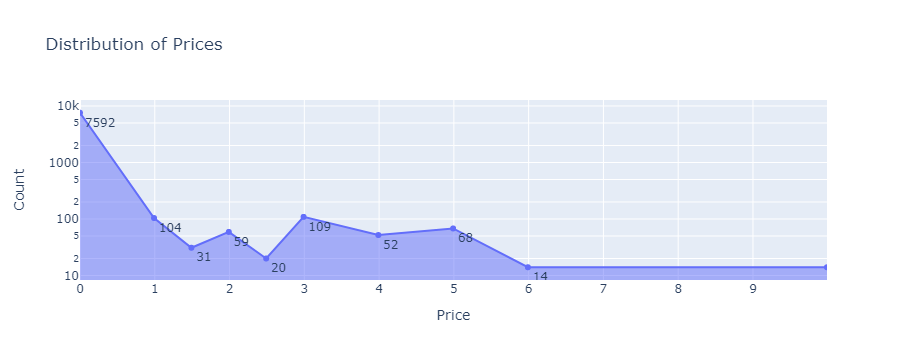

In [48]:
fig = px.area(overall_price, x='Price', y='Count', log_y=True, text='Count', title='Distribution of Prices')
fig.update_traces(textposition='bottom right')
fig.show()

#### Correlation Matrix
    - the only significant correlation is between reviews and ratings
    - the other columns do not exhibit any significant relationship

In [26]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

C:\Users\tomas\AppData\Local\Temp\ipykernel_2164\571399007.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Rating,Reviews,Installs,Price
Rating,1.00,0.06,0.04,-0.02
Reviews,0.06,1.00,0.62,-0.01
Installs,0.04,0.62,1.00,-0.01
Price,-0.02,-0.01,-0.01,1.00


#### Relationship bettwen reviews and ratings
- apps with higher rating usually have more reviews
    - R^2 is very low but we can at leat notice the trend
- we can then hypothesize that an app with higher rating attracts users to download the app and leave a review which would explain the relationship reviews and rating

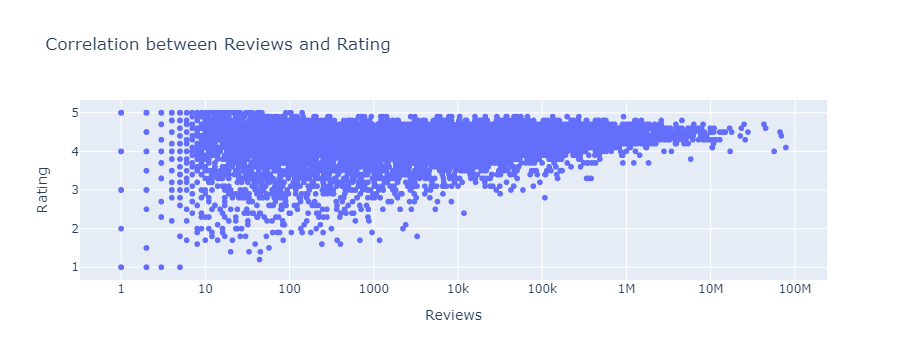

In [38]:
px.scatter(df, x='Reviews', y='Rating',log_x=True, title='Correlation between Reviews and Rating')

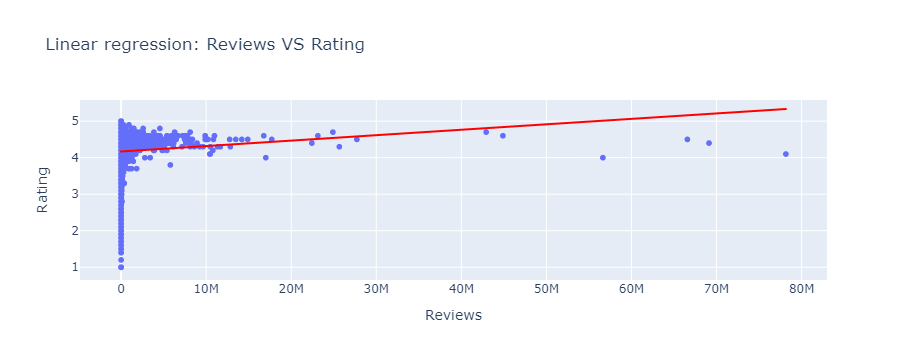

In [40]:
px.scatter(df, x='Reviews', y='Rating', trendline='ols', trendline_color_override='red', title='Linear regression: Reviews VS Rating')

### Key Findings
- top 10 most popular apps:
	- all apps have the same and highest value of installations that Google Play Store provides (1,000,000,000+)
	- all apps have rating reaching from 4.3 to 4.5
	- most common category is 'Communication' but there are many others
        - there are 8 different categories among the top 10 most popular apps
	- the most common content rating is 'Everyone'
	- all of the apps are free
- the whole dataset:
	- the categories used in the top 10 most popular apps are not commonly used across the whole dataset
		- finding niche might be a good course of action if we aim to develop one of the top apps on the market
	- the most coomonly used categories are family, games, and tools
	- the most commonly used content rating is 'Everyone'
	- the price, number of installations, and reviews are usually low, with expection to rating whcih has an average of 4.2
	 - the majority of apps are free (7592 / 8196)
		- the average price is 1.04 USD with few extreme outliners
		- the most common price is located between 0 and 5 USD
	- the only significant correlation exists between reviews and ratings
		- apps with higher rating usually have more reviews
		- we can then hypothesize that an app with higher rating attracts users to download the app and leave a 
		  review which would explain the relationship